### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
#These libraries help with data handling, visualization, ML modeling, and evaluation.


### LOADING THE DATA SET

In [5]:
data = pd.read_csv('diabetes.csv')

In [11]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### EXPLORATORY DATA ANALYSIS

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#info() gives column types.

In [22]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#describe() gives stats like mean, min, max.

In [32]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#isnull() checks for missing values.

In [35]:
# If there are missing values, we must handle them using imputation or removal.



### DATA VISUALIZATION

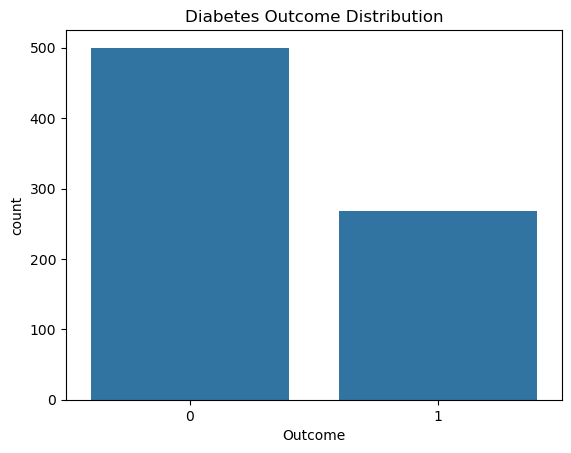

In [39]:
sns.countplot(x='Outcome', data=data)
plt.title("Diabetes Outcome Distribution")
plt.show()

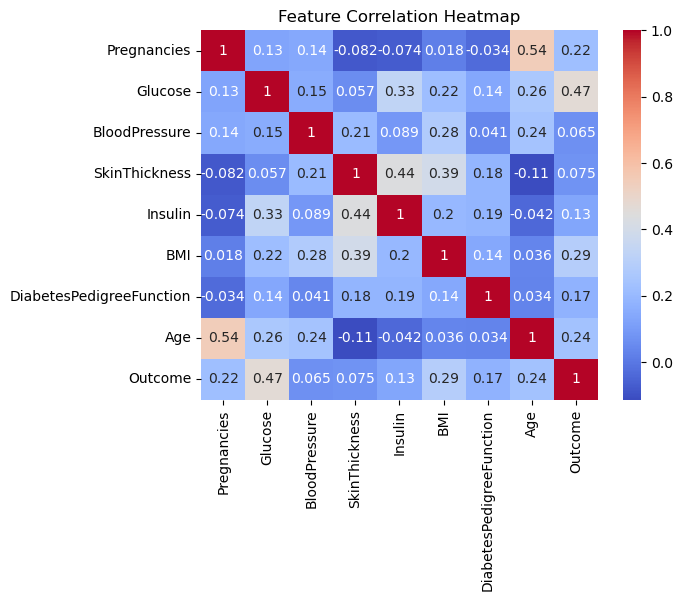

In [41]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [43]:
#countplot() shows class balance (important for classification).
#heatmap() shows correlation between features

### DATA PROCESSING

In [46]:
#features and target split:

In [48]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [50]:
#standardization

In [52]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [54]:
#train test split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [58]:
#We separate features and target.
#We scale features to normalize them.
#We split data: 80% for training, 20% for testing.

### MODEL TRAINING

In [68]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [70]:
#Logistic Regression is a classification algorithm. It works well for binary output like 0 or 1 (No/Yes).



### MODEL PREDICTION

In [73]:
y_pred = model.predict(X_test)

### MODEL EVALUATION

In [78]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7532467532467533
Confusion Matrix:
 [[79 20]
 [18 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [80]:
#Accuracy: % of correctly predicted outputs.

#Confusion Matrix: Shows TP, FP, TN, FN.

#Classification Report: Includes precision, recall, and F1-score.

### SAVING THE MODEL

In [83]:
import joblib
joblib.dump(model, 'disease_prediction_model.pkl')

['disease_prediction_model.pkl']